In [76]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close
0,17-10-17,159.779999,160.869995,159.229996,160.470001
1,18-10-17,160.419998,160.710007,159.600006,159.759995
2,19-10-17,156.750000,157.080002,155.020004,155.979996
3,20-10-17,156.610001,157.750000,155.960007,156.250000
4,23-10-17,156.889999,157.690002,155.500000,156.169998


In [77]:
x = np.array(df['Close'])

In [78]:
data = pd.read_csv("AA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,14-12-05,68.293259,68.894012,67.764603,68.461472,57.216415,1872700
1,15-12-05,68.461472,69.062218,67.764603,67.836693,56.694252,1318800
2,16-12-05,68.341316,69.062218,67.836693,67.836693,56.694252,2115600
3,19-12-05,67.668480,68.653709,67.644447,68.605652,57.336903,2097100
4,20-12-05,68.365349,69.038193,67.716537,68.004898,56.834835,1890100


In [79]:
data.Date = pd.to_datetime(data.Date, format='%d-%m-%y') # need same format as Date
data = data.set_index(data.Date)
data = data.drop_duplicates(keep=False) # get rid of mkt closed times

In [80]:
price = data.Close

In [81]:
max_index = list(argrelextrema(price.values, np.greater, order=10)[0]) 
min_index = list(argrelextrema(price.values, np.less, order=10)[0])

In [82]:
idx = max_index + min_index
idx.sort()

In [83]:
peaks = price.values[idx]

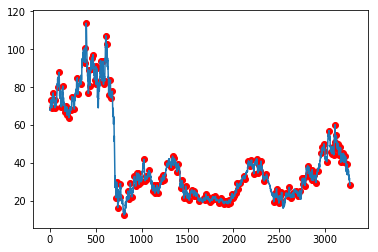

In [84]:
plt.plot(price.values)
plt.scatter(idx,peaks,c='r')
plt.show()

# Harmonics Functions

In [85]:
# peak finder

def peak_detect(price, order=10):
    
    max_index = list(argrelextrema(price, np.greater, order=order)[0]) 
    min_index = list(argrelextrema(price, np.less, order=order)[0])
    
    idx = max_index + min_index + [len(price)-1]
    
    idx.sort()
    
    # get the pattern 5 steps
    current_idx = idx[-5:]
    
    # starter & ender
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price[current_idx]
    
    return current_idx, current_pat, start, end

In [86]:
def gartley(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.27 - err_allowed, 0.618 + err_allowed]) * abs(BC)
    
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        
        # Gartley      
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NAN
            
    # bearish Gartley        
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        
        # BGartley       
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NAN
    
    else:
        return np.NAN

In [87]:
def butterfly(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.786 - err_allowed, 0.786 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)
    
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        
        # Gartley      
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NAN
            
    # bearish Gartley        
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        
        # BGartley       
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NAN
    
    else:
        return np.NAN

In [88]:
def bat(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.382 - err_allowed, 0.5 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([1.618 - err_allowed, 2.618 + err_allowed]) * abs(BC)
    
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        
        # Gartley      
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NAN
            
    # bearish Gartley        
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        
        # BGartley       
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NAN
    
    else:
        return np.NAN

In [89]:
def crab(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    BC = moves[2]
    CD = moves[3]
    
    AB_range = np.array([0.382 - err_allowed, 0.618 + err_allowed]) * abs(XA)
    BC_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(AB)
    CD_range = np.array([2.24 - err_allowed, 3.618 + err_allowed]) * abs(BC)
    
    if XA > 0 and AB < 0 and BC > 0 and CD < 0:
        
        # Gartley      
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return 1
        else:
            return np.NAN
            
    # bearish Gartley        
    elif XA < 0 and AB > 0 and BC < 0 and CD > 0:
        
        # BGartley       
        if AB_range[0] < abs(AB) < AB_range[1] and BC_range[0] < abs(BC) < BC_range[1] and CD_range[0] < abs(CD) < CD_range[1]:
            return -1
        else:
            return np.NAN
    
    else:
        return np.NAN

In [90]:
def walk_forward(price, sign, slippage=4, stop=10):
    
    slippage = float(slippage)/float(10000)
    stop_amount = float(stop)/float(10000)
    
    if sign == 1:
        initial_stop_loss = price[0] - stop_amount
        stop_loss = initial_stop_loss
        
        for i in range(1, len(price)):
            move = price[i] - price[i-1]
            
            if move > 0 and (price[i] - stop_amount) > initial_stop_loss:
                stop_loss = price[i] - stop_amount
            
            elif price[i] < stop_loss:
                return stop_loss - price[0] - slippage
            
    elif sign == -1:
        initial_stop_loss = price[0] + stop_amount
        stop_loss = initial_stop_loss
        
        for i in range(1, len(price)):
            move = price[1] - price[i-1]
            
            if move < 0 and (price[i] + stop_amount) < initial_stop_loss:
                stop_loss = price[i] + stop_amount
            
            elif price[i] > stop_loss:
                return price[0] - stop_loss - slippage
                

# harmonics

 21%|████████████████▏                                                            | 665/3173 [00:00<00:00, 3402.12it/s]

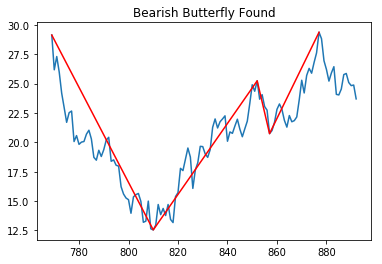

 34%|█████████████████████████▊                                                  | 1079/3173 [00:00<00:00, 2305.83it/s]

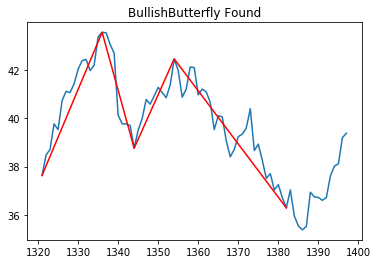

 40%|██████████████████████████████▊                                             | 1284/3173 [00:00<00:01, 1738.98it/s]

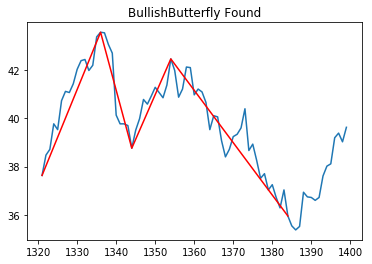

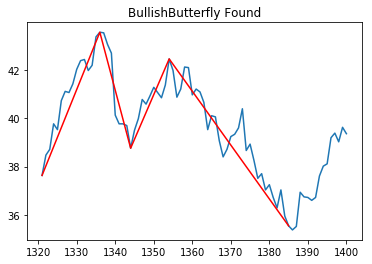

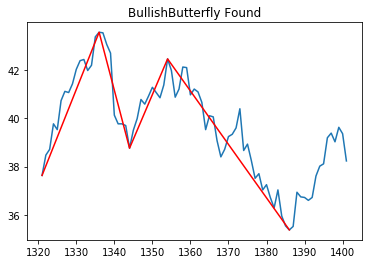

 46%|██████████████████████████████████▌                                         | 1444/3173 [00:00<00:01, 1106.51it/s]

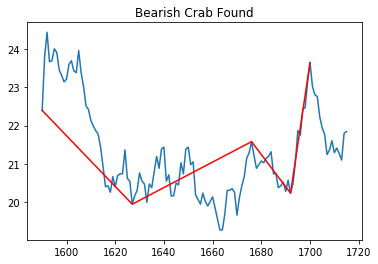

 66%|██████████████████████████████████████████████████▍                         | 2107/3173 [00:01<00:00, 1358.66it/s]

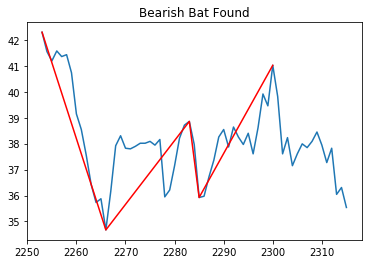

 76%|█████████████████████████████████████████████████████████▉                  | 2418/3173 [00:01<00:00, 1238.02it/s]

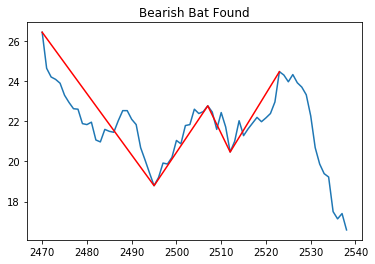

100%|████████████████████████████████████████████████████████████████████████████| 3173/3173 [00:02<00:00, 1411.47it/s]


In [91]:
# must load the Harmonic Functions cells 1st

# Error allowance 
err_allowed = 5.0/100

for i in tqdm(range(100, len(price))):
     
    current_idx, current_pat, start, end = peak_detect(price.values[:i])
    
    # up down up down - XA ...
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]
    
    moves = [XA, AB, BC, CD] 
    
    gart = gartley(moves, err_allowed)
    butt = butterfly(moves, err_allowed)
    batman = bat(moves, err_allowed)
    crabman = crab(moves, err_allowed)
    
    harmonics = np.array([gart, butt, batman, crabman])
    labels = ["Gartley", "Butterfly", "Bat", "Crab"]
    
    if np.any(harmonics == 1) or np.any(harmonics == -1):
        
        for j in range(0, len(harmonics)):
            if  harmonics[j] == 1 or harmonics[j] == -1:
                sense = "Bearish " if harmonics[j] == -1 else "Bullish"
                label = sense + labels[j] + " Found"
                
                
                if harmonics[j] == 1:
                    pips += 1000*(price[end+1:end+16] - price[end])
                    
                elif harmonics[j] == -1:
                    pips += 1000*(price[end] - price[end+1:end+16])
                           
                plt.title(label)
                plt.plot(np.arange(start, i+15), price.values[start:i+15])
                plt.plot(current_idx, current_pat, c="r")
                plt.show()

 19%|██████████████▊                                                              | 612/3173 [00:00<00:00, 3118.86it/s]

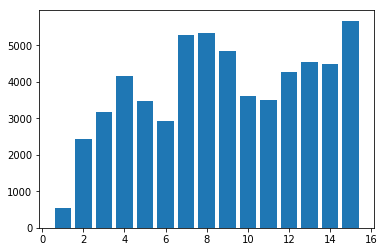

 35%|██████████████████████████▎                                                 | 1097/3173 [00:00<00:01, 1506.13it/s]

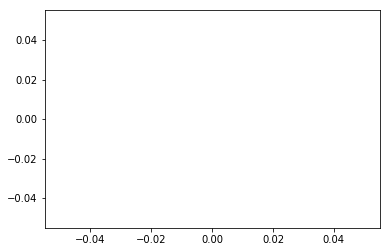

 40%|██████████████████████████████▊                                             | 1284/3173 [00:00<00:01, 1169.30it/s]

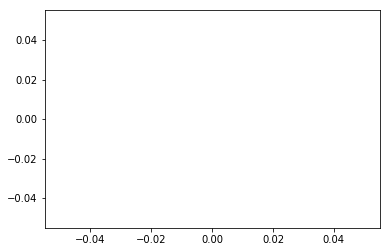

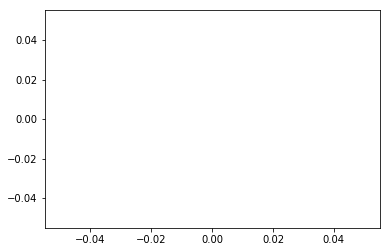

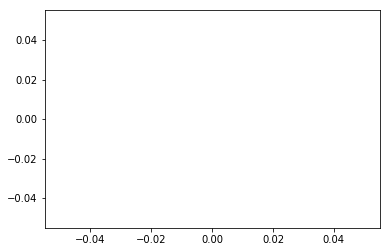

 50%|██████████████████████████████████████▊                                      | 1598/3173 [00:01<00:02, 587.29it/s]

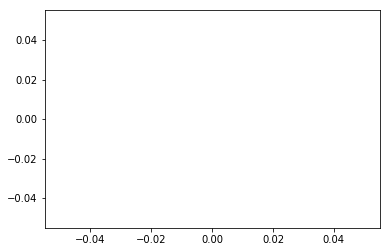

 68%|████████████████████████████████████████████████████▍                        | 2162/3173 [00:02<00:01, 853.61it/s]

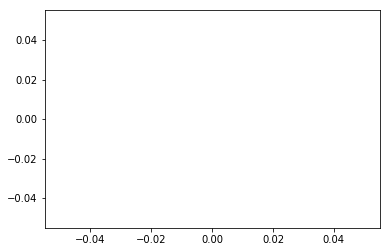

 72%|███████████████████████████████████████████████████████▌                     | 2288/3173 [00:02<00:01, 673.43it/s]

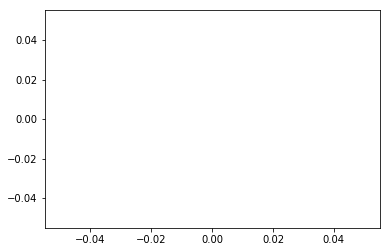

100%|█████████████████████████████████████████████████████████████████████████████| 3173/3173 [00:03<00:00, 923.51it/s]


In [92]:
# Error allowance 
err_allowed = 5.0/100

pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
# dynamic plots
plt.ion()

for i in tqdm(range(100, len(price))):
     
    current_idx, current_pat, start, end = peak_detect(price.values[:i])
    
    # up down up down - XA ...
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]
    
    moves = [XA, AB, BC, CD] 
    
    gart = gartley(moves, err_allowed)
    butt = butterfly(moves, err_allowed)
    batman = bat(moves, err_allowed)
    crabman = crab(moves, err_allowed)
    
    harmonics = np.array([gart, butt, batman, crabman])
    labels = ["Gartley", "Butterfly", "Bat", "Crab"]
    
    if np.any(harmonics == 1) or np.any(harmonics == -1):
        
        for j in range(0, len(harmonics)):
            if  harmonics[j] == 1 or harmonics[j] == -1:
                sense = "Bearish " if harmonics[j] == -1 else "Bullish"
                label = sense + labels[j] + " Found"
                
                
                if harmonics[j] == 1:
                    pips += 1000*(price[end+1:end+16] - price[end])
                    
                elif harmonics[j] == -1:
                    pips += 1000*(price[end] - price[end+1:end+16])
                
                
                
                
                # plot for gains
                plt.clf()
                plt.bar(np.arange(1,16), pips)
                plt.pause(0.05)
                plt.show()
                
                #plt.title(label)
                #plt.plot(np.arange(start, i+15), price.values[start:i+15])
                #plt.plot(current_idx, current_pat, c="r")
                #plt.show()

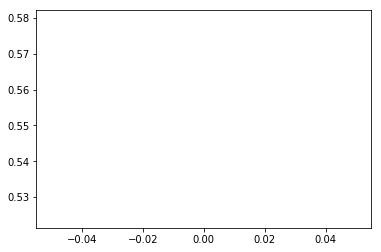

No handles with labels found to put in legend.


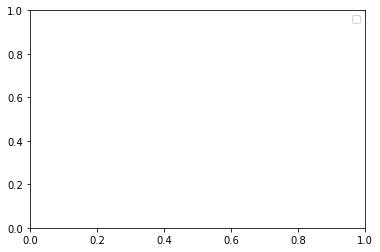

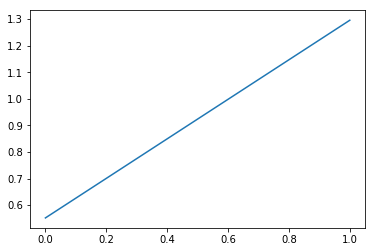

No handles with labels found to put in legend.


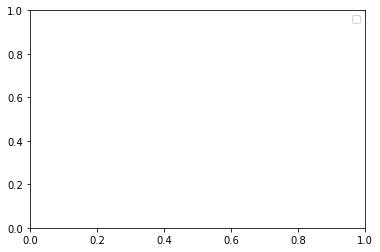

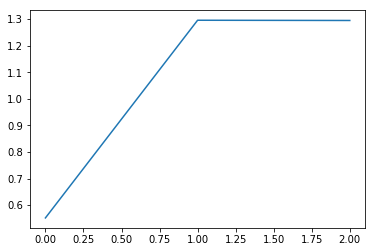

No handles with labels found to put in legend.


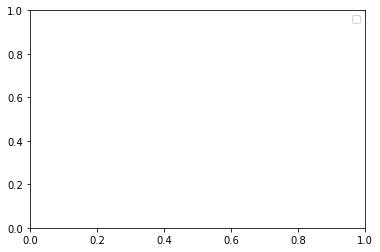

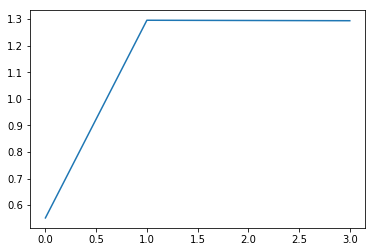

No handles with labels found to put in legend.


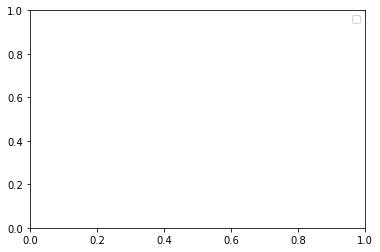

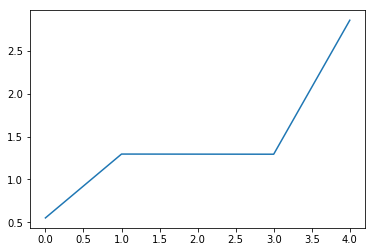

No handles with labels found to put in legend.


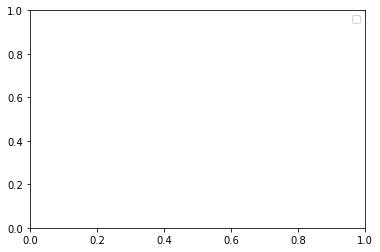

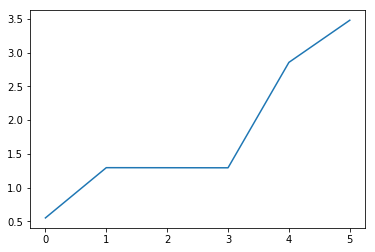

No handles with labels found to put in legend.


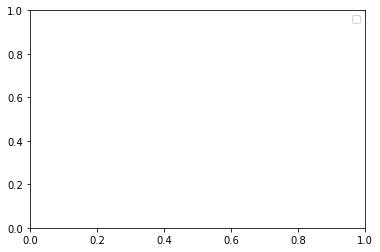

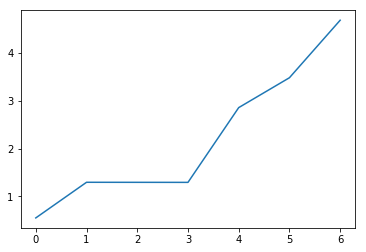

No handles with labels found to put in legend.


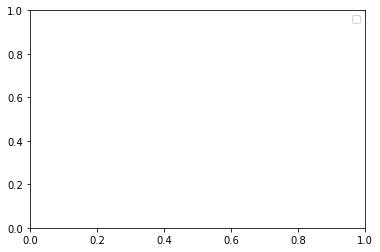

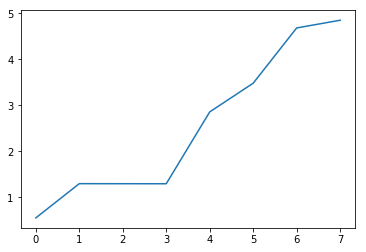

No handles with labels found to put in legend.


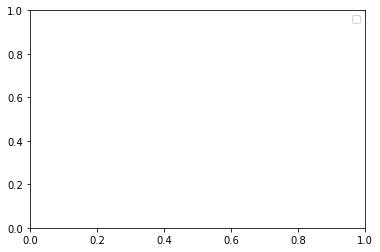

In [93]:
# Rewrite with Risk Managent employed
# must load the Harmonic Functions cells 1st

# Error allowance 
err_allowed = 5.0/100

pnl = []
trade_dates = []

correct_pats = 0
pats = 0

plt.ion()

for i in range(100, len(price)):
     
    current_idx, current_pat, start, end = peak_detect(price.values[:i])
    
    # up down up down - XA ...
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]
    
    moves = [XA, AB, BC, CD] 
    
    gart = gartley(moves, err_allowed)
    butt = butterfly(moves, err_allowed)
    batman = bat(moves, err_allowed)
    crabman = crab(moves, err_allowed)
    
    harmonics = np.array([gart, butt, batman, crabman])
    labels = ["Gartley", "Butterfly", "Bat", "Crab"]
    
    if np.any(harmonics == 1) or np.any(harmonics == -1):
        
        pats += 1
        
        for j in range(0, len(harmonics)):
            if  harmonics[j] == 1 or harmonics[j] == -1:
                sense = "Bearish " if harmonics[j] == -1 else "Bullish"
                label = sense + labels[j] + " Found"
                
                start = np.array(current_idx).min()
                end = np.array(current_idx).max()
                date = data.iloc[end].name  # when; detected pattern at the end; gives date
                trade_dates = np.append(trade_dates, date)
                
                pips = walk_forward(price.values[end:], harmonics[j], slippage=4, stop=5) # tighten 
                pnl = np.append(pnl, pips)
                
                cumpips = pnl.cumsum()
                
                if pips > 0:
                    correct_pats += 1
                
                lbl = "Accuracy" + str(100*float(correct_pats)/float(pats)) + " %"
                
                
                plt.clf()
                plt.plot(cumpips, label=lbl)
                plt.pause(0.05)
                plt.legend()
                plt.show()

# V618

In [100]:
def v618(moves, err_allowed):
    XA = moves[0]
    AB = moves[1]
    
    AB_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(XA)
   
        
    # bearish v618
    if XA < 0 and AB > 0:
              
        if AB_range[0] < abs(AB) < AB_range[1]:
            return -1
        else:
            return np.NAN
    
    else:
        return np.NAN

  0%|                                                                                         | 0/3173 [00:00<?, ?it/s]

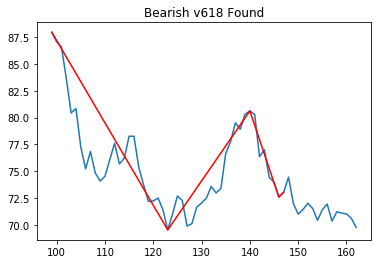

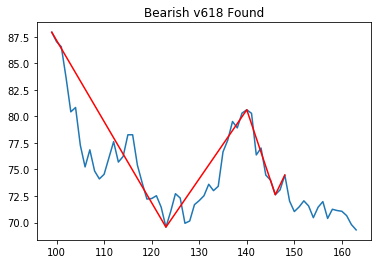

  2%|█▏                                                                             | 50/3173 [00:00<00:09, 336.47it/s]

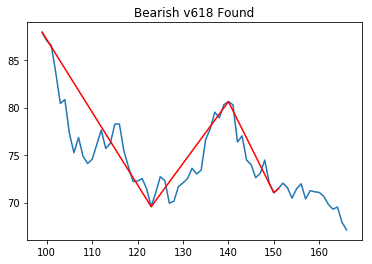

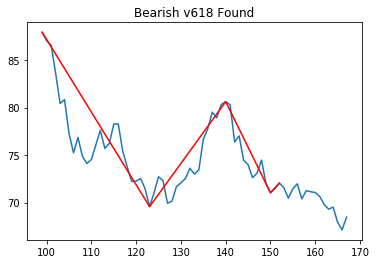

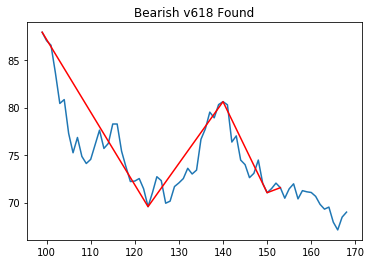

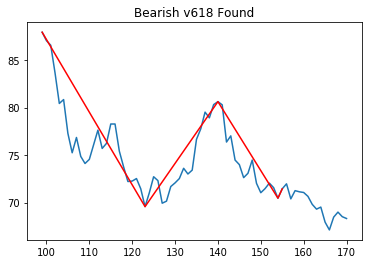

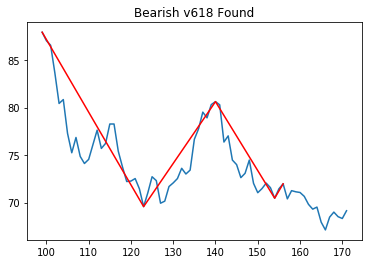

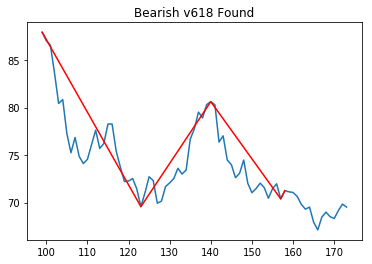

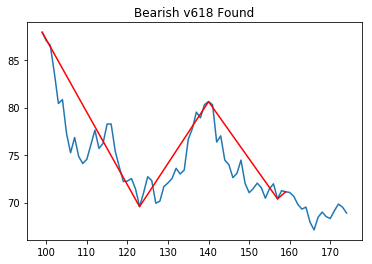

  2%|█▌                                                                              | 61/3173 [00:00<00:45, 68.40it/s]

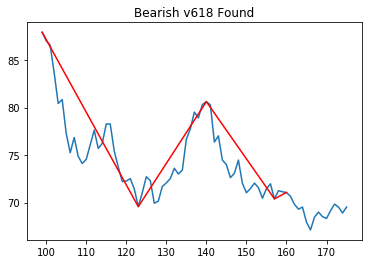

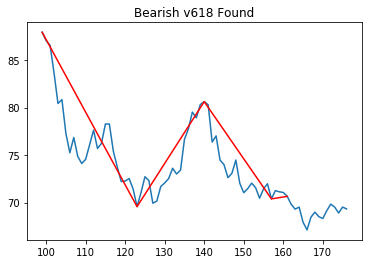

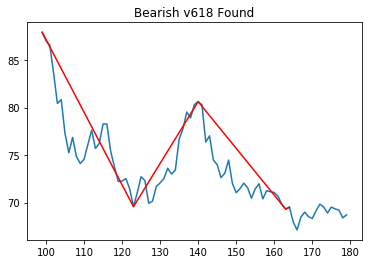

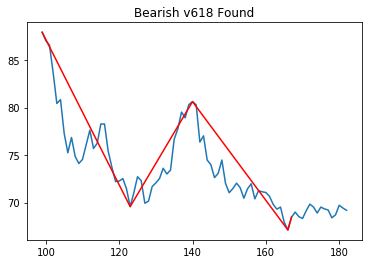

  2%|█▋                                                                              | 69/3173 [00:00<00:59, 51.86it/s]

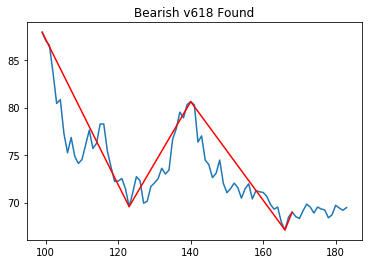

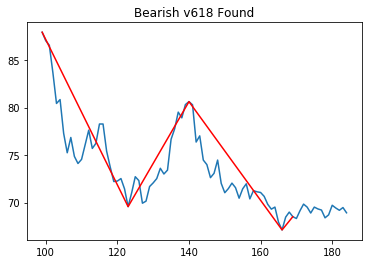

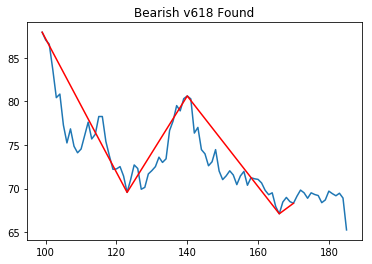

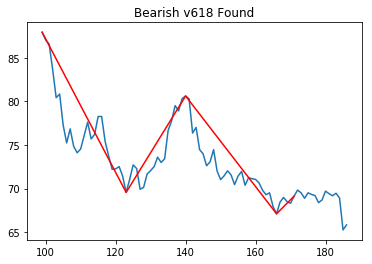

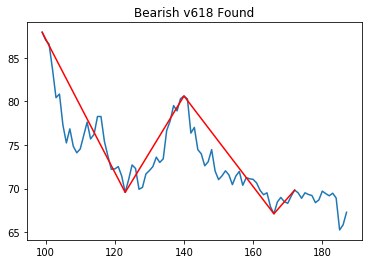

  2%|█▉                                                                              | 76/3173 [00:01<01:20, 38.36it/s]

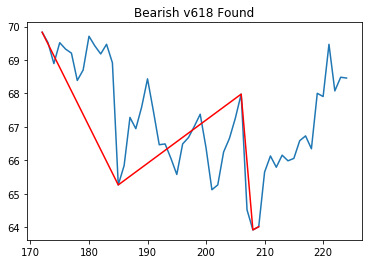

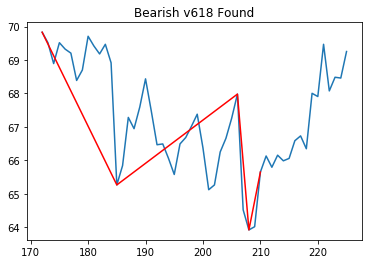

  4%|██▊                                                                            | 112/3173 [00:01<00:59, 51.56it/s]

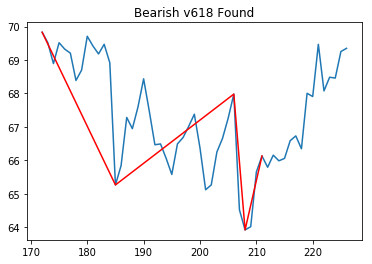

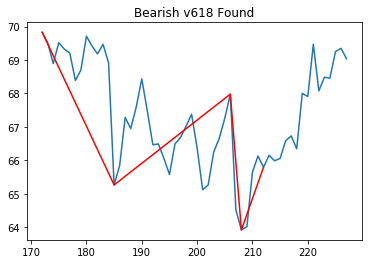

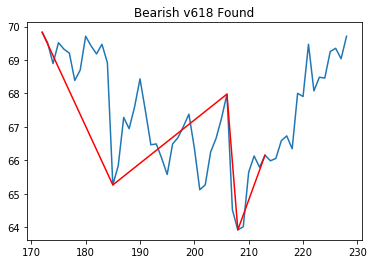

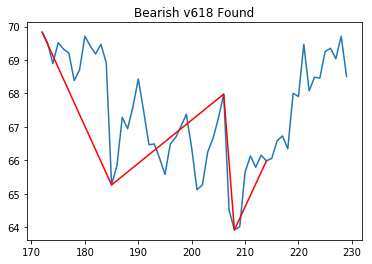

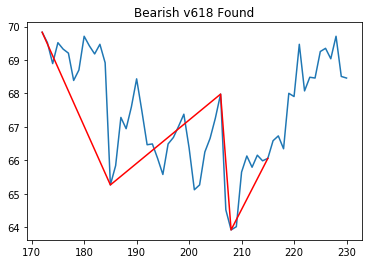

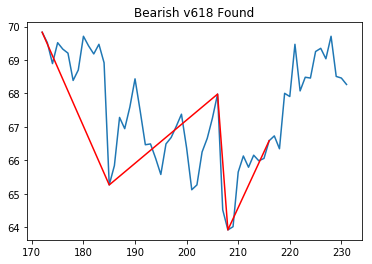

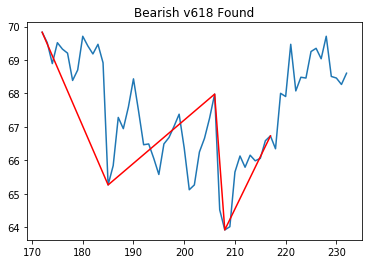

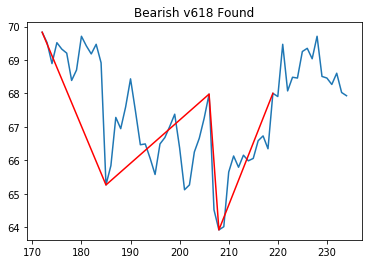

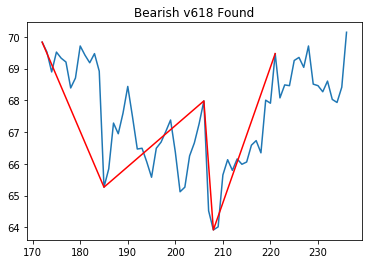

  4%|███                                                                            | 124/3173 [00:01<01:32, 33.02it/s]

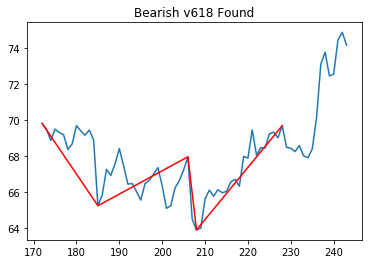

  5%|███▊                                                                           | 155/3173 [00:02<01:06, 45.10it/s]

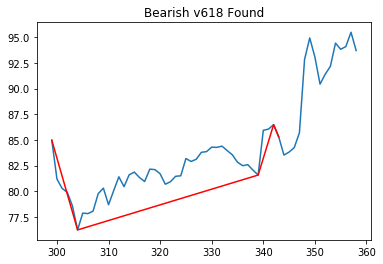

  8%|██████                                                                         | 245/3173 [00:02<00:46, 62.83it/s]

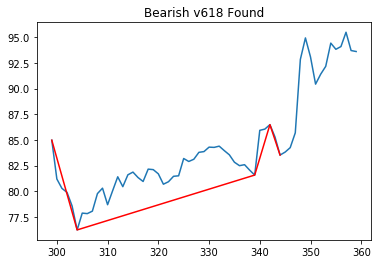

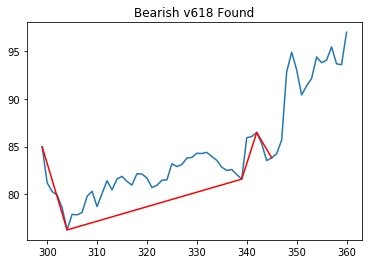

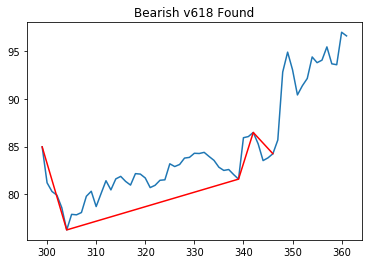

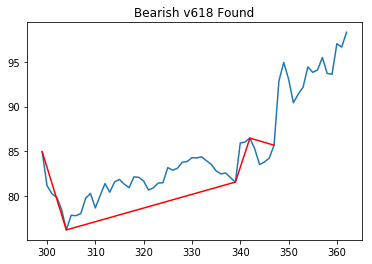

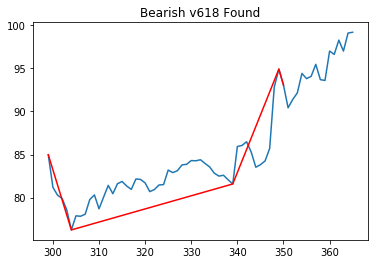

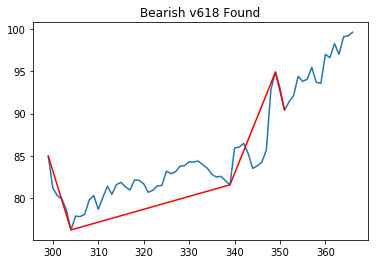

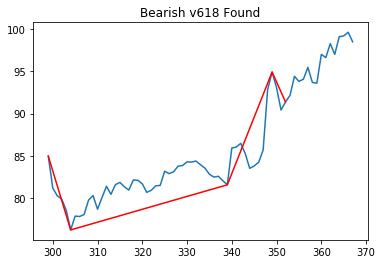

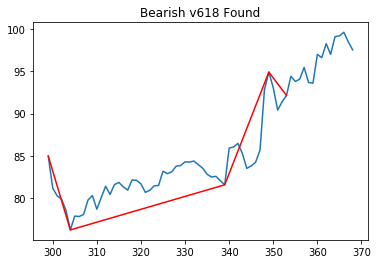

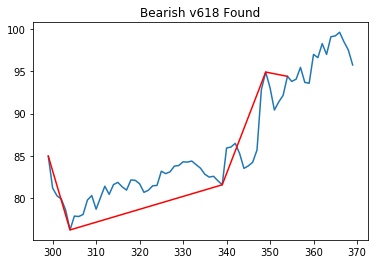

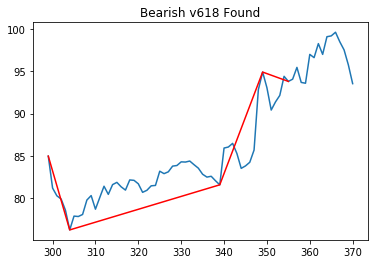

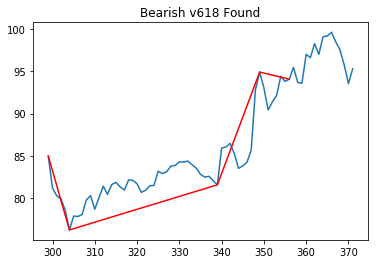

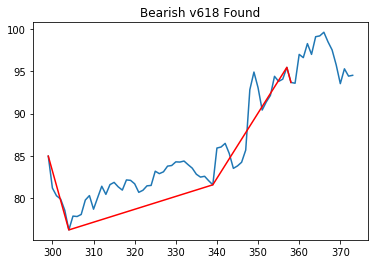

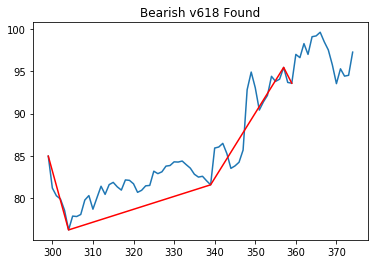

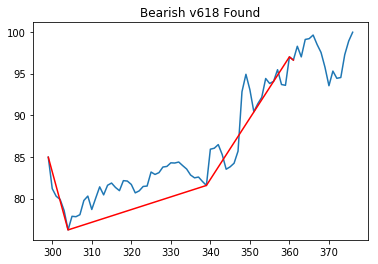

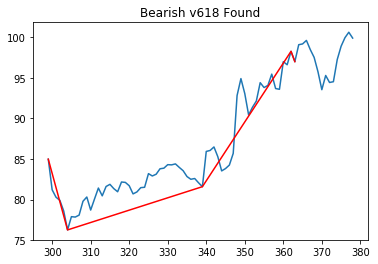

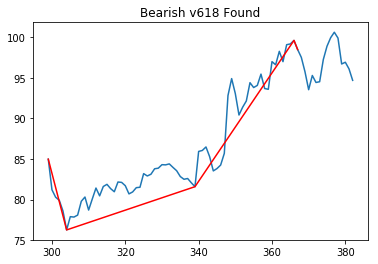

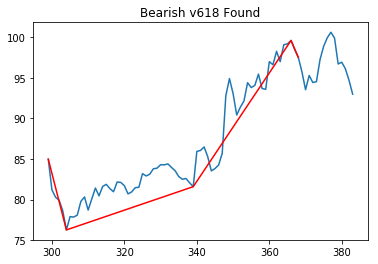

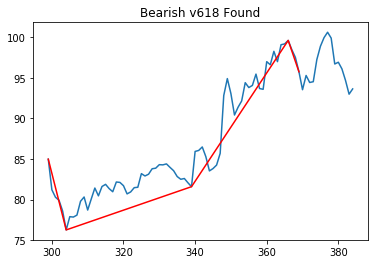

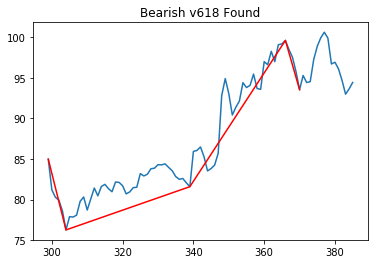

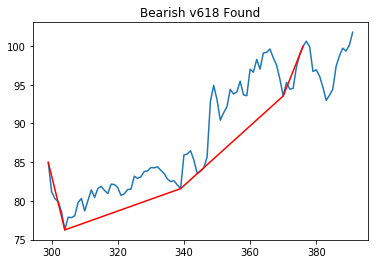

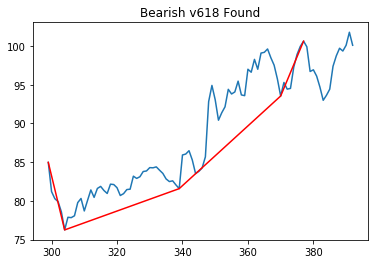

 20%|███████████████▌                                                               | 627/3173 [00:03<00:44, 57.83it/s]

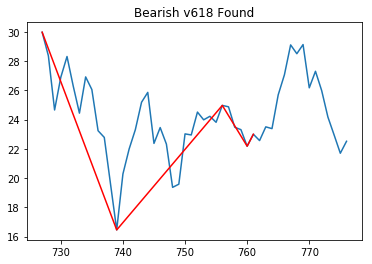

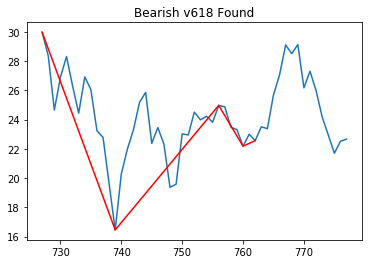

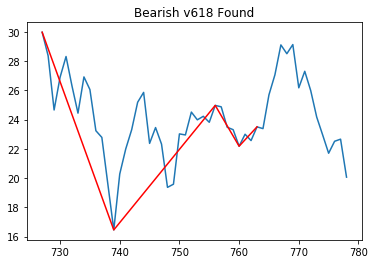

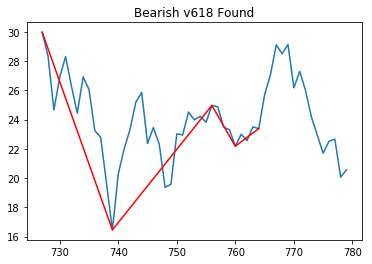

 39%|█████████████████████████████▉                                               | 1234/3173 [00:04<00:12, 151.86it/s]

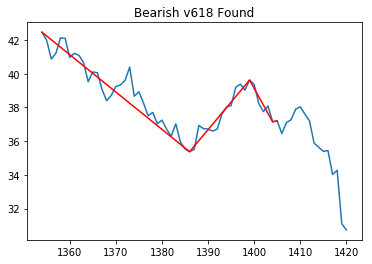

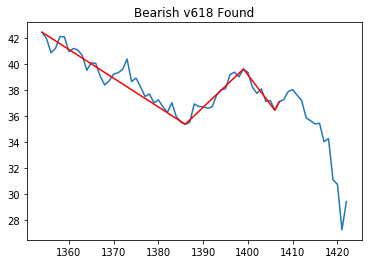

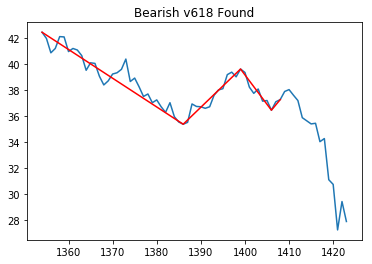

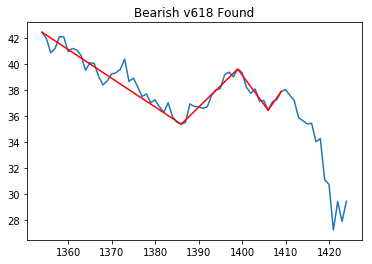

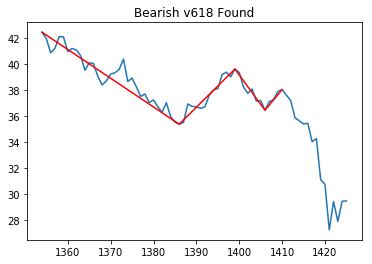

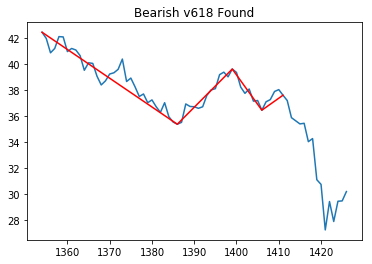

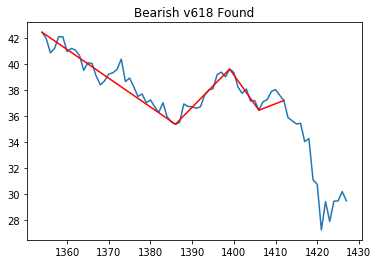

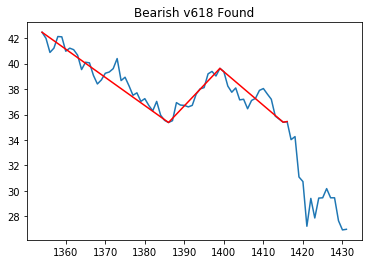

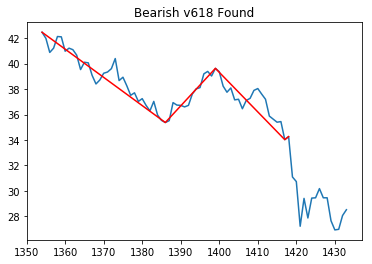

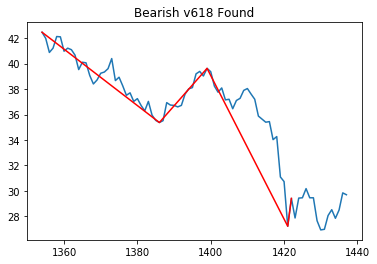

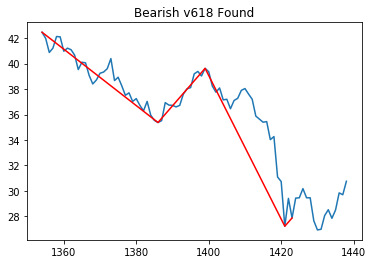

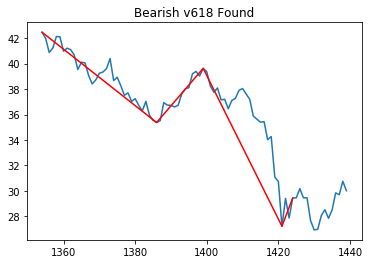

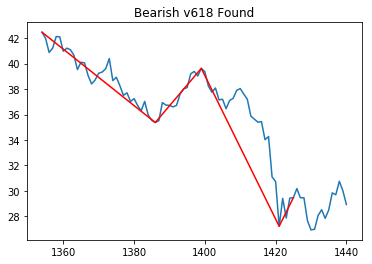

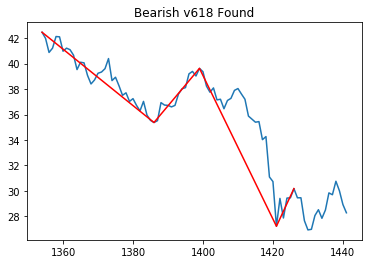

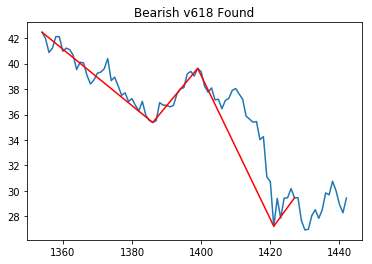

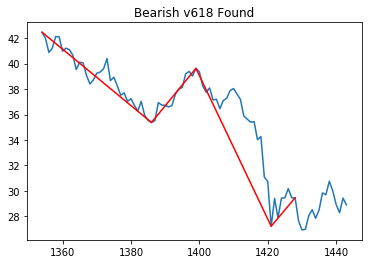

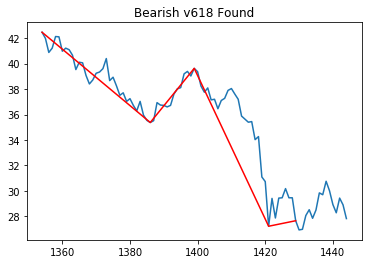

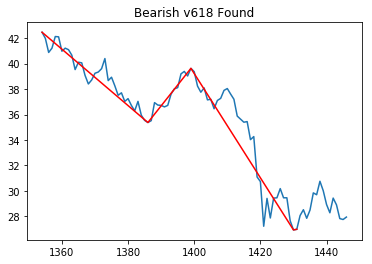

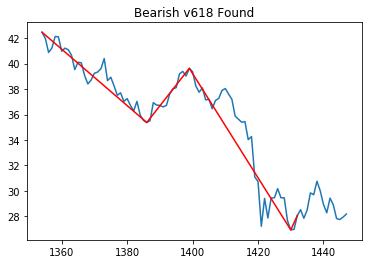

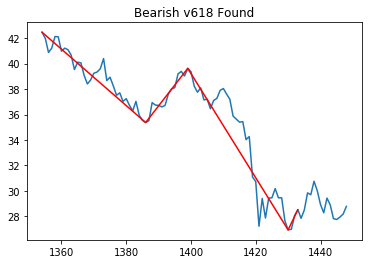

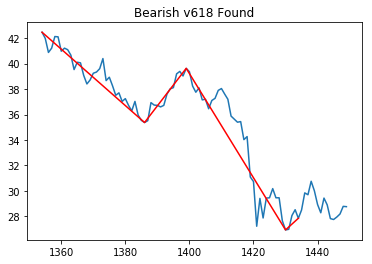

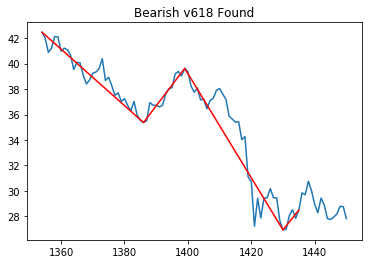

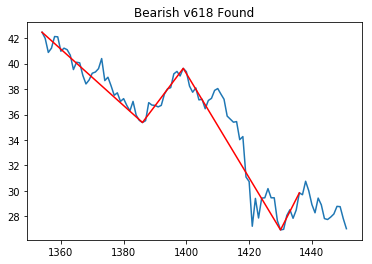

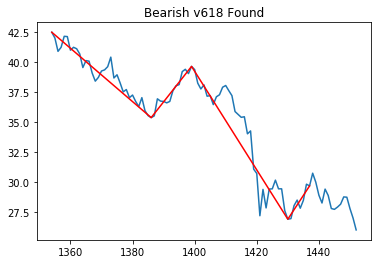

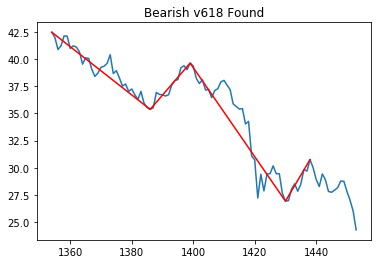

 44%|██████████████████████████████████                                           | 1403/3173 [00:06<00:13, 128.09it/s]

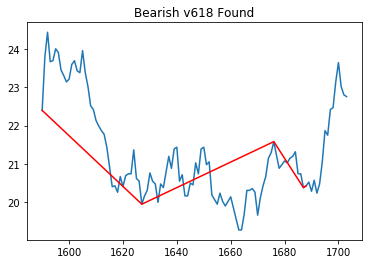

 50%|██████████████████████████████████████▌                                      | 1590/3173 [00:06<00:09, 175.69it/s]

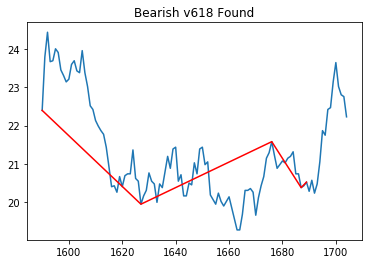

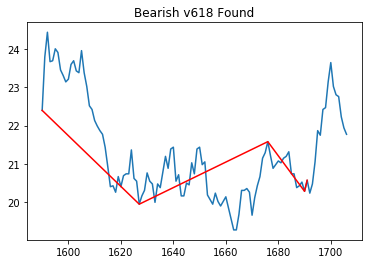

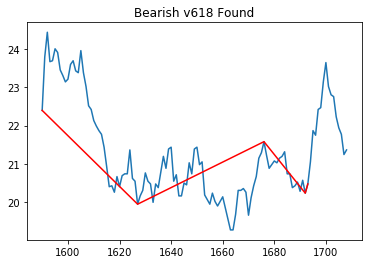

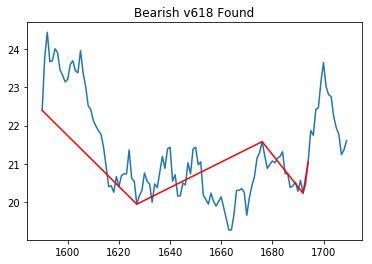

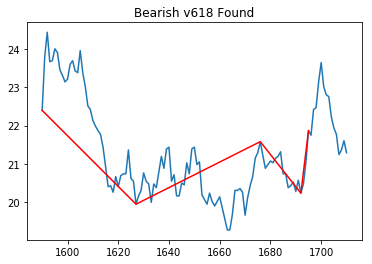

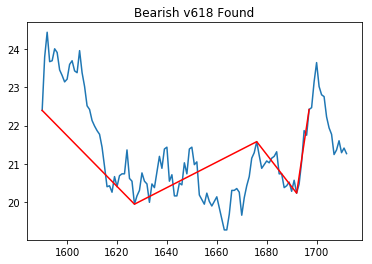

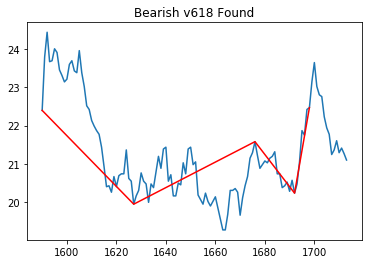

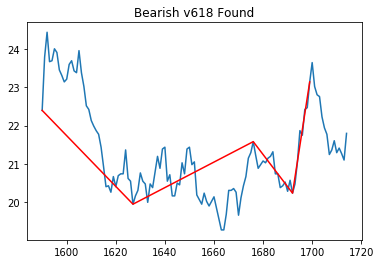

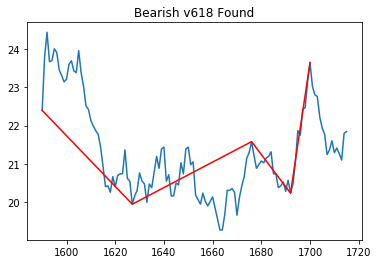

 93%|███████████████████████████████████████████████████████████████████████▌     | 2949/3173 [00:07<00:00, 965.22it/s]

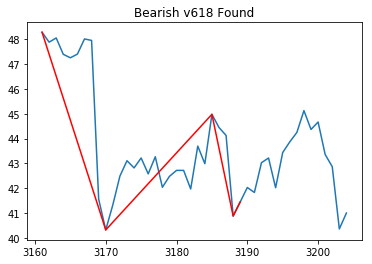

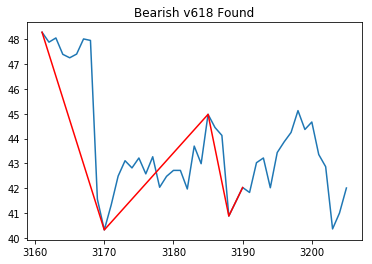

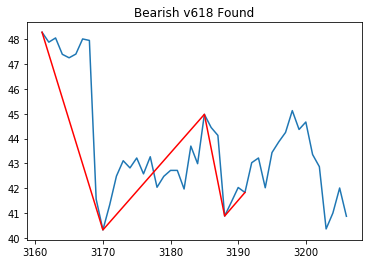

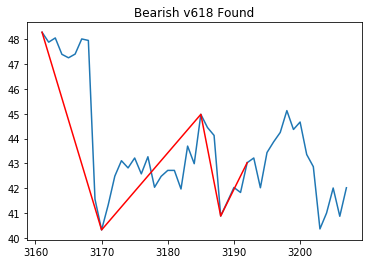

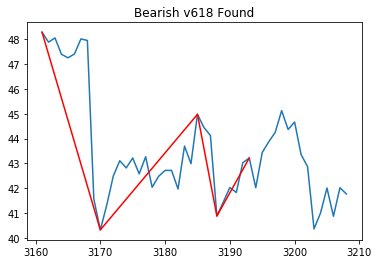

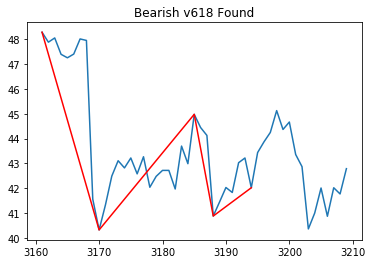

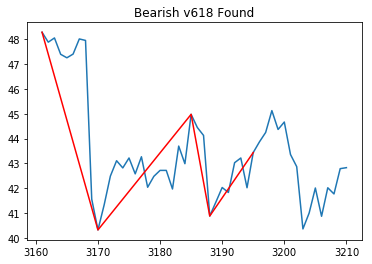

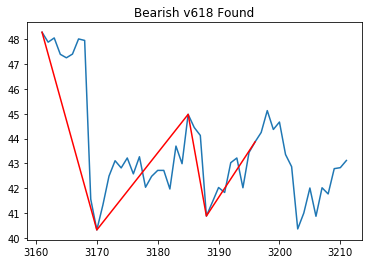

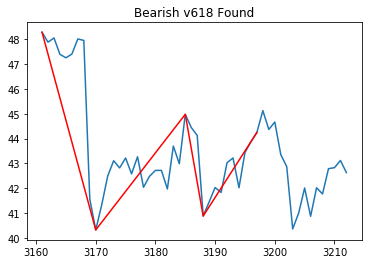

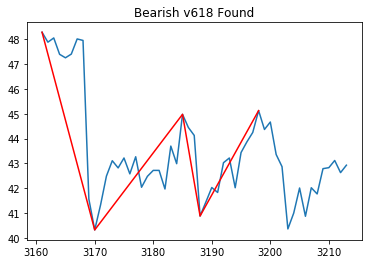

100%|█████████████████████████████████████████████████████████████████████████████| 3173/3173 [00:08<00:00, 372.67it/s]


In [103]:
# Error allowance 
err_allowed = 5.0/100

for i in tqdm(range(100, len(price))):
     
    current_idx, current_pat, start, end = peak_detect(price.values[:i])
    
    # up down up down - XA ...
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
   
    moves = [XA, AB] 
    
    tas = v618(moves, err_allowed)
    
    labels = "v618"
            
    if tas == -1:
        sense = "Bearish "
        label = sense + labels + " Found"
                               
                          
        plt.title(label)
        plt.plot(np.arange(start, i+15), price.values[start:i+15])
        plt.plot(current_idx, current_pat, c="r")
        plt.show()